In [1]:
import pandas as pd
import seaborn as sns
import warnings
import imblearn
import matplotlib as plt
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, warnings, os.path
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("360_inj_cyc_e114_deneme.csv")

In [3]:
df['reason'] = df['reason'].replace(['[]'],0)
df['reason'][df['reason'] != 0] = 1
df = df.astype({"reason": int})


In [4]:
drop_list = ['Unnamed: 0', 'date', 'cntCycle','stsMachine','timestamp','sfc','decMold','prsInjectionHyd1','prsTransferHyd1','strCushion1','strPlasticisation1','strTransfer1']

In [5]:
df = df.drop(drop_list, axis=1)
df = df.fillna(df.mean())

In [9]:
cols = list(df.columns)
for x in cols:
    print(x+ ", ", end="")

tmpMoldZone25, timCool1, tmpBarrel2Zone3, tmpMoldZone3, tmpBarrel2Zone4, tmpFlange1, tmpMoldZone4, tmpBarrel2Zone1, tmpFlange2, tmpMoldZone1, volCushion1, tmpBarrel2Zone2, tmpMoldZone2, volCushion2, prsBackSpec2, prsBackSpec1, spdInjection1, tmpMoldZone9, spdInjection2, tmpMoldZone7, tmpMoldZone8, tmpOil, tmpMoldZone5, tmpMoldZone6, tmpMoldZone19, tmpMoldZone18, volTransfer2, tmpMoldZone15, volTransfer1, tmpMoldZone14, tmpMoldZone17, tmpMoldZone16, timTransfer2, timTransfer1, velPlasticisation2, velPlasticisation1, timMoldClose, tmpBarrel1Zone5, tmpMoldZone22, tmpBarrel1Zone4, tmpMoldZone21, tmpMoldZone24, tmpBarrel1Zone6, tmpMoldZone23, prsPomp1, tmpBarrel1Zone1, prsPomp2, tmpBarrel1Zone3, tmpMoldZone20, tmpBarrel1Zone2, volShot1, volPlasticisation2, volShot2, volPlasticisation1, timFill1, timFill2, timMoldOpen, tmpMoldZone11, tmpMoldZone10, tmpMoldZone13, tmpMoldZone12, prsHoldSpec2, tmpNozle2, prsHoldSpec1, tmpNozle1, prsTransferSpec2, prsTransferSpec1, prsInjectionSpec1, prsInjecti

In [6]:
#Class count
count_class_0, count_class_1 = df.reason.value_counts()
#Divide by class
df_class_0 = df[df['reason'] == 0]
df_class_1 = df[df['reason'] == 1]

In [7]:
y = df['reason']
X = df.drop(['reason'], axis=1)

In [8]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

[(0, 39645), (1, 39645)]


In [9]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_resampled, y_resampled) # doctest : +ELLIPSIS

LinearSVC()

In [17]:
print(len(X),len(X_resampled))
print(len(y),len(y_resampled))



<bound method DataFrame.count of        tmpMoldZone25  timCool1  tmpBarrel2Zone3  tmpMoldZone3  \
0              235.0     44.02            230.3         254.8   
1              224.9     37.44            238.3         264.5   
2              225.0     37.44            238.2         264.5   
3              225.0     37.44            238.2         264.5   
4              225.0     37.44            238.3         264.5   
...              ...       ...              ...           ...   
79285         3276.7     53.02             49.1         210.0   
79286         3276.7     49.05             48.9         209.9   
79287         3276.7     50.02             46.3         209.9   
79288         3276.7     53.02             54.1         210.0   
79289         3276.7     50.02             49.3         210.0   

       tmpBarrel2Zone4  tmpFlange1  tmpMoldZone4  tmpBarrel2Zone1  tmpFlange2  \
0                229.9       250.1         255.0            235.1       235.1   
1                237.9  

In [10]:
X = X_resampled
y = y_resampled

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [12]:
np.any(np.isnan(X_train))

False

In [13]:
X_train = X_train.fillna(X_train.mean())

Confusion Matrix:
 [[7897   38]
 [   1 7922]]
Accuracy:
 0.9975406734771094
Precision:
 0.9952261306532664
Recall:
 0.9998737851823805
AUC:
 0.99998656730769


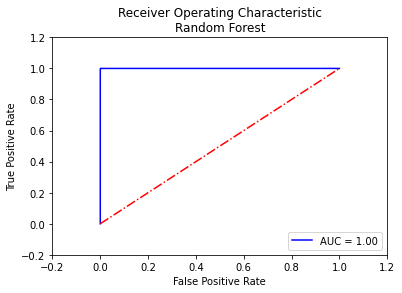

In [14]:
#Random Forest with 'entropy' criterion

rf2=RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=3)
model = rf2.fit(X_train,y_train)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

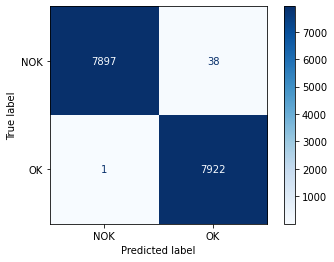

In [15]:
cm = metrics.confusion_matrix(y_val,y_rf2)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[7934    1]
 [  60 7863]]
Accuracy:
 0.9961533610795813
Precision:
 0.9998728382502543
Recall:
 0.9924271109428247
AUC:
 0.9961505434991376


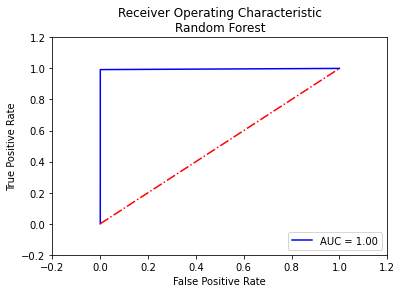

In [16]:
threshold = 0.9
y_rf_prob2_val = rf2.predict_proba(X_val)[:,1]
prob_thresh = (y_rf_prob2_val>=threshold).astype('int')
CM_2_Thresh = confusion_matrix(y_val,prob_thresh)
print("Confusion Matrix:\n", CM_2_Thresh)
print("Accuracy:\n",metrics.accuracy_score(y_val,prob_thresh))
print("Precision:\n",metrics.precision_score(y_val,prob_thresh))
print("Recall:\n",metrics.recall_score(y_val,prob_thresh))
print("AUC:\n",metrics.roc_auc_score(y_val,prob_thresh))

auc=metrics.roc_auc_score(y_val,prob_thresh)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,prob_thresh)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()